# Single Model Energy-depedent Classification Performance Analysis

In [1]:
%matplotlib inline
import setup

# Simply Run the usual experiment, using -L option to specify the model to load
# Sets up the model and the data

%run -im CaloDNN.ClassificationExperiment -- --NoAnalysis --NoTrain --cpu -L TrainedModels.Run.4/CaloDNN_512_3_0.001_RMSprop_0.001_Merged.1 

Using GPU 0
HyperParameter Scan:  240 possible combiniations.
______________________________________
ScanConfiguration
______________________________________
Picked combination:  0
Combo[0]={'Width': 32, 'Depth': 1, 'lr': 0.01, 'optimizer': "'RMSprop'", 'decay': 0.01}
Model Filename:  CaloDNN_32_1_0.01_RMSprop_0.01
______________________________________
Couldn't import dot_parser, loading of dot files will not be possible.


Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, cuDNN 5105)


Using PremixGenerator.
Loading Model From: TrainedModels.Run.4/CaloDNN_512_3_0.001_RMSprop_0.001_Merged.1
Output Directory: TrainedModels/CaloDNN_512_3_0.001_RMSprop_0.001_Merged.1
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 25, 25, 25)    0                                            
____________________________________________________________________________________________________
input_2 (InputLayer)             (None, 5, 5, 60)      0                                            
____________________________________________________________________________________________________
flatten_1 (Flatten)              (None, 15625)         0                                            
____________________________________________________________________________________________________
flatten_2 (

In [4]:
Norms=[150.,150.,1.]
N_Test_Events=100000
Test_genC1 = MakePreMixGenerator(InputFile, BatchSize=BatchSize,
                                Skip=NSamples, Max=N_Test_Events,
                                Norms=Norms+[1.], ECAL=True, Energy=True,
                                HCAL=True, n_threads=n_threads)

# Preload the data, adding target which contains the energy

Test_genC1.PreloadData()

Test_X_ECAL, Test_X_HCAL, Test_Y, target = tuple(Test_genC1.D)


In [5]:
print Test_X_ECAL.shape
print Test_X_HCAL.shape
print Test_Y.shape
print target.shape
print Norms

(101024, 25, 25, 25)
(101024, 5, 5, 60)
(101024, 4)
(101024, 1, 5)
[150.0, 150.0, 1.0]


/home/afarbin/.virtualenvs/keras2/local/lib/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


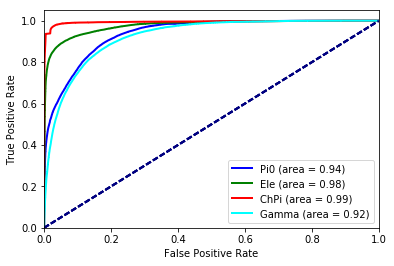

In [6]:
# Make the ROC Curves
# Also performs inference on the test data, returning the results
from DLAnalysis.Classification import *
result,NewMetaData=MultiClassificationAnalysis(MyModel,[Test_X_ECAL,Test_X_HCAL],Test_Y,BatchSize,
                                                       IndexMap={0:'Pi0', 2:'ChPi', 3:'Gamma', 1:'Ele'})

In [7]:
# Bin the data
Energy=target[:,:,2].flatten()

def AUCvsEnergy(E_min=10.,E_max=510.,E_bins=100.):
    BD,E_binning=BinDataIndex(Energy, E_min, E_max, E_bins)
    # Run the Classification Analysis in Bins
    return BinMultiClassificationAnalysis(MyModel,Test_Y=Test_Y,Y_binning=E_binning,
                                          bin_indecies=BD, result=result,
                                          IndexMap={0:'Pi0', 2:'ChPi', 3:'Gamma', 1:'Ele'})

/home/afarbin/.virtualenvs/keras2/local/lib/python2.7/site-packages/sklearn/metrics/ranking.py:542: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


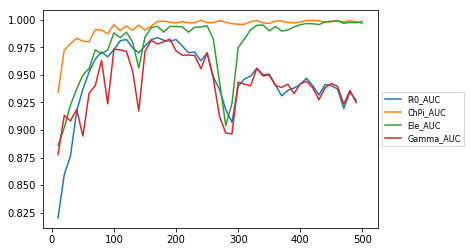

In [8]:
# Full Energy Range
Res=AUCvsEnergy(10.,510.,50.)

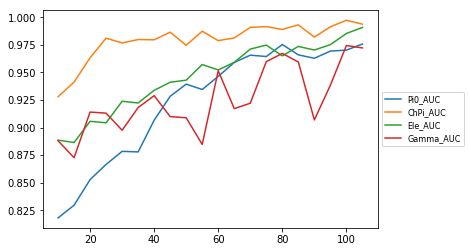

In [9]:
# 10 to 100 GeV
Res=AUCvsEnergy(10.,110.,20.)

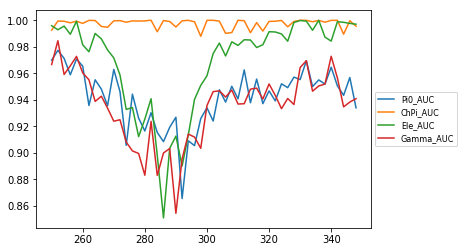

In [10]:
# 250 to 350 GeV
Res=AUCvsEnergy(250.,350.,50.)

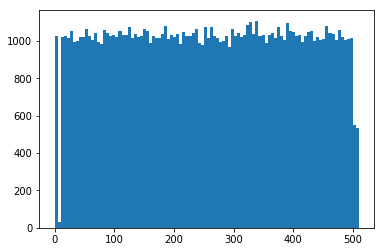

In [11]:
tmp=plt.hist(Energy,bins=100)